In [24]:
import geoplot as gplt 
import geoplot.crs as gcrs
import geopandas as gpd
gpd.__version__
import matplotlib.pyplot as plt
import pandas as pd
import pyproj
from fiona.crs import from_epsg
import mapclassify as mc
import glob

#해안선 받아놓기

coastline= gpd.read_file('./Coastlinse_khoa/Coastlinse_khoa.shp', encoding='utf8')
#5179로변환  

coastline= coastline.to_crs(epsg=5179)

In [25]:
#맵 그리기 함수선언
def plot_map(data):
    ax = data.plot(figsize=(50, 30),facecolor='yellow', edgecolor='black',linewidth=0.5, zorder=2)
    coastline.plot(facecolor='#f6ebd4', edgecolor='black',ax=ax, zorder=1,linewidth=0.5)
    plt.grid(True, alpha=0.5, linestyle='--')
    
def plot_colormap(data, column, interval, data2=None, data3=None, figsize = [50,30]):
    if data2 is None:
        ax = data.plot(column, figsize=figsize,cmap = 'jet', linewidth=0, k=interval, legend=False)
        coastline.plot(facecolor='#f6ebd4', edgecolor='black',ax=ax, zorder=2,linewidth=0.5)
        plt.grid(True, alpha=0.5, linestyle='--')
    elif data3 is None:
        ax = data.plot(column, figsize=figsize,cmap = 'jet', linewidth=0, k=interval, legend=False)
        data2.plot(ax = ax, facecolor='black', edgecolor='black',linewidth=0.5)
        coastline.plot(facecolor='#f6ebd4', edgecolor='black',ax=ax, zorder=2,linewidth=0.5)
        plt.grid(True, alpha=0.5, linestyle='--')
    else:
        ax = data.plot(column, figsize=figsize,cmap = 'jet', linewidth=0, k=interval, legend=False)
        data2.plot(ax = ax, facecolor='black', edgecolor='black',linewidth=0.5)
        data3.plot(ax = ax, facecolor='red', edgecolor='black',linewidth=0.5)
        coastline.plot(facecolor='#f6ebd4', edgecolor='black',ax=ax, zorder=2,linewidth=0.5)
        plt.grid(True, alpha=0.5, linestyle='--')


In [2]:
input = gpd.read_file('./Ex/220203/남한육역 면적/남한육역 면적.shp', encoding='utf8')
# plot_map(input)

In [28]:
flist = glob.glob('./Ex/220214/test/**/*.shp', recursive=True)
for fname in flist:
    print(fname.split('\\')[-1])
# flist

와이블등급계수test.shp
와이블등급계수수정.shp


In [29]:
# flist = ['D:/###기타업무/개인연구/2021/Geopandas/Ex/220203/법정정보/9.환경생태계(26)/해양보호생물서식지.shp']
for fname in flist[:1]:
    print(fname.split('\\')[-1])
    try:
        object = gpd.read_file(fname, encoding='utf8')
        # object = object['geometry']
    except Exception as e:
        # print(e, fname)
        object = gpd.read_file(fname, encoding='euckr')
        # object = object['geometry']
    # print(object)   
    object= object.to_crs(epsg=5179)
    result = gpd.overlay( input, object, how='difference')
    try:
        result = gpd.overlay(object, input,how='difference')
    
    # columnlist = result.columns.tolist()
    # result=result[[columnlist[0], 'geometry']]
        # result=result[['geometry']]

    # print('저장을 시작합니다')
        result.to_file('./result/ex10/shp/'+fname.split('\\')[-1], encoding='euckr')
    except Exception as e:
        print(e)
        pass
    print('저장이 완료되었습니다' )
    
    # result = gpd.sjoin(object, input,  op='intersects')
    # plt.savefig('./result
    # /ex8/'+fname.split('\\')[-1].split('.')[0],dpi=300)
    # plt.savefig('./result/ex8/test.png')
    # result.drop_duplicates(['MIN1'], keep='first', inplace=True)

와이블등급계수test.shp


KeyboardInterrupt: 

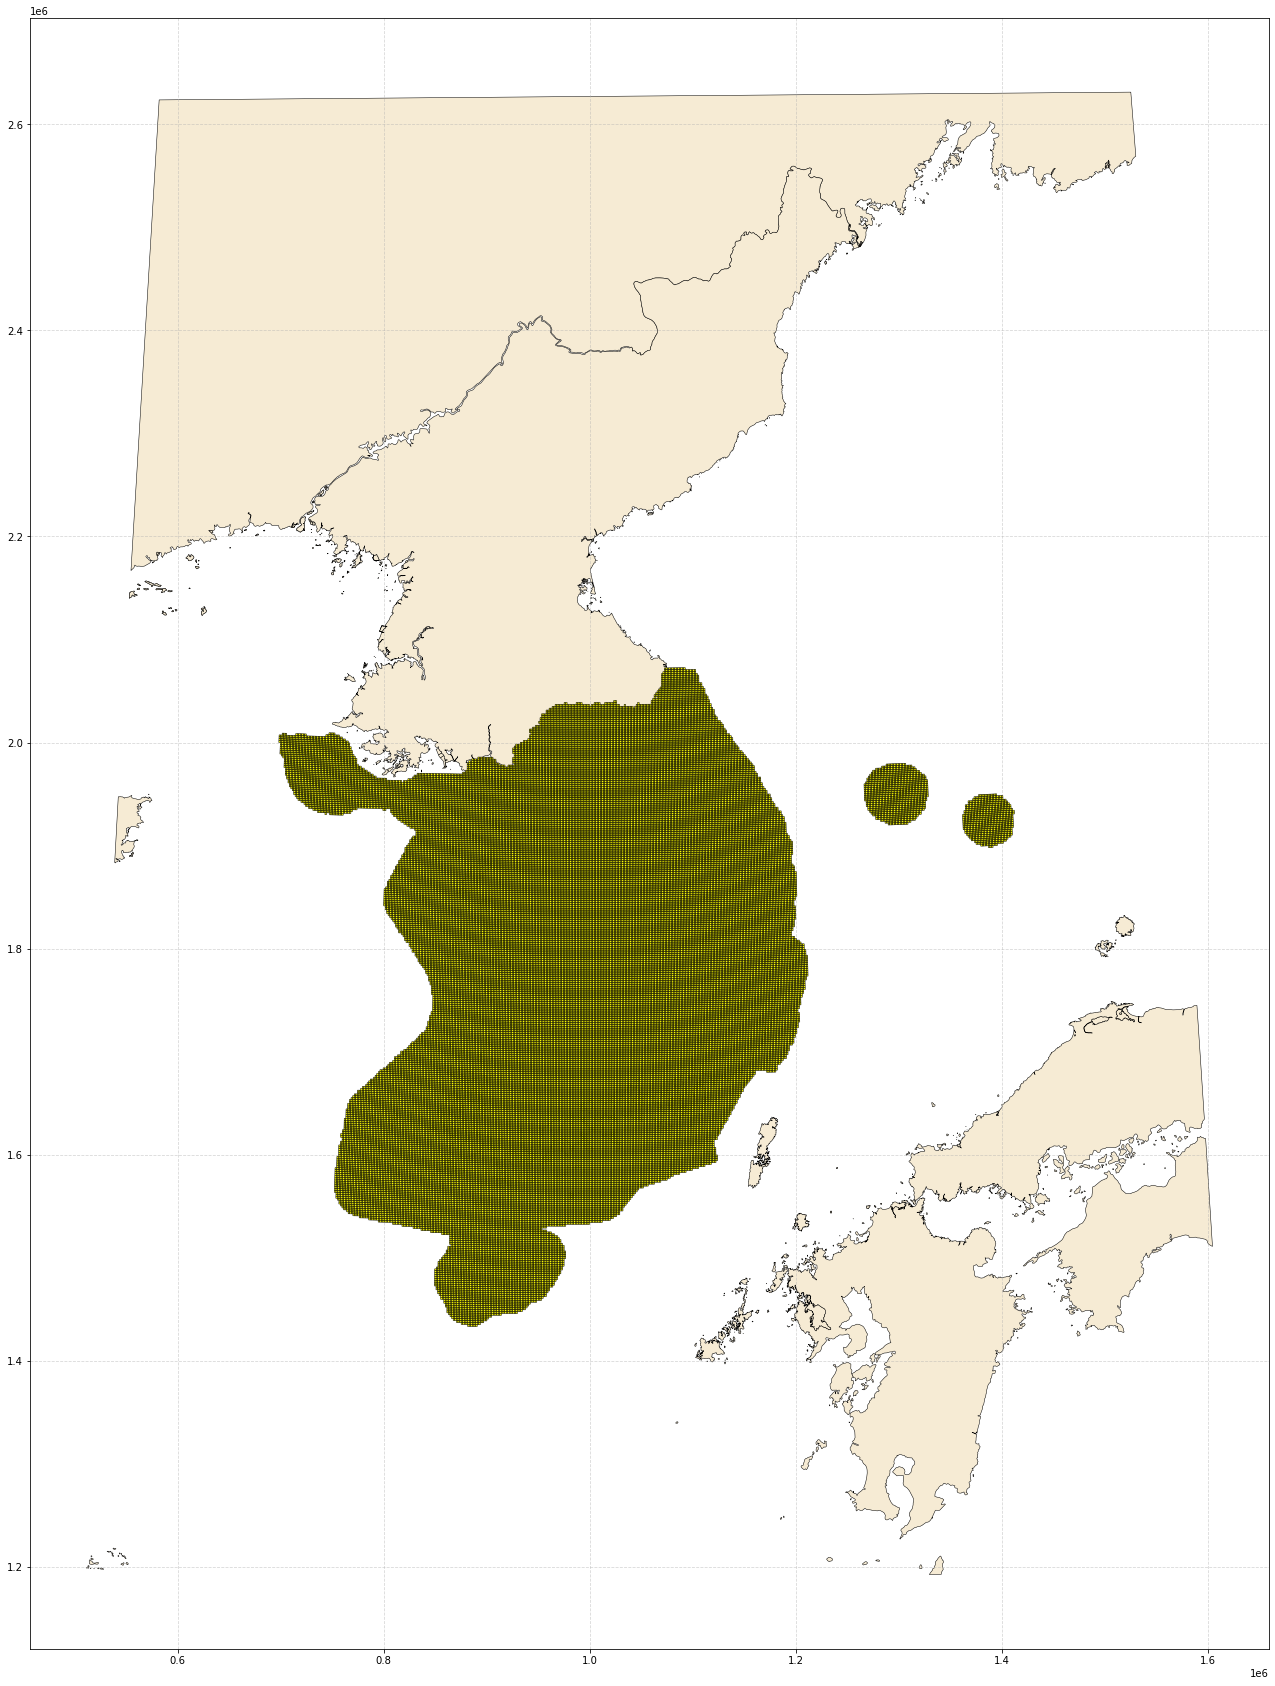

In [27]:
plot_map(object)

In [20]:
object.dropna(subset=['geometry'], inplace=True)
object

,MIN1,SA1_mod,MIN3,SA3_mod,밀집,어획량,어업생산이,조업인원,어업형태갯,geometry
0,GR9_F1K13_U7,1,GR3_F1K13_U,1,1.0,300.0,2484252.0,4.0,1.0,"POLYGON ((513768.631 1960612.579, 515243.226 1..."
1,GR9_F3G13_F3,1,GR3_F3G13_F,1,2.0,60.0,1197608.0,8.0,1.0,"POLYGON ((499074.772 1647588.609, 500603.613 1..."
2,GR9_F3C33_Q1,1,GR3_F3C33_Q,1,4.0,50.0,130770.0,16.0,1.0,"POLYGON ((503028.856 1691932.845, 504550.197 1..."
3,GR9_F3G13_B5,1,GR3_F3G13_B,1,2.0,1000.0,4755872.0,140.0,1.0,"POLYGON ((502332.993 1651124.767, 503861.183 1..."
4,GR9_F3G31_B8,1,GR3_F3G31_B,1,1.0,30.0,598804.0,4.0,1.0,"POLYGON ((500733.280 1621506.926, 502266.422 1..."
...,...,...,...,...,...,...,...,...,...,...
119355,GR9_G2K44_T3,1,GR3_G2K44_T,1,1.0,3000.0,24842520.0,11.0,1.0,"POLYGON ((1665481.188 1926451.195, 1666965.622..."
119356,GR9_G2K44_T6,1,GR3_G2K44_T,1,1.0,3000.0,24842520.0,11.0,1.0,"POLYGON ((1665628.006 1924597.984, 1667112.773..."
119357,GR9_G2K44_T9,1,GR3_G2K44_T,1,2.0,3010.0,25017520.0,15.0,2.0,"POLYGON ((1665774.769 1922744.769, 1667259.867..."
119358,GR9_G2K44_Y3,1,GR3_G2K44_Y,1,1.0,3000.0,24842520.0,11.0,1.0,"POLYGON ((1665921.475 1920891.551, 1667406.906..."


In [21]:
object[object['geometry'].isnull() ==True]

,MIN1,SA1_mod,MIN3,SA3_mod,밀집,어획량,어업생산이,조업인원,어업형태갯,geometry


In [17]:
object['geometry'].unique()

<GeometryArray>
 ...
Length: 119360, dtype: geometry